**Welcome to the first programming assignment for CS 443 RL!**

This assignment will get you familiar with the OpenAI gym environment and estimation via sampling trajectories.

**For submission: Please convert the iPython notebook (containing both outputs and your code) into pdf, and append the pdf to that of your written work.**

In [68]:
import gym
print(gym.__version__) # should be 0.25.2

0.25.2


We will be playing on the Cartpole environment. As the title suggests, the task in this environment is to balance a pole on top of a cart. The official description of the environment from the Gym website (https://www.gymlibrary.dev/) is:

> This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in "Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem". A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

The environment is loaded as follows:

In [69]:
env = gym.make('CartPole-v1') # ignore the warning
env.reset() # must reset the environment before interacting with it
print (env.action_space) # show the action space, which has 2 actions
print (env.observation_space) # show the state (observation) space, which is a
                              # 4-dimensional vector with components of
                              # [position, velocity,
                              #  pole angle, pole velocity at tip]

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


More information can be found on the following page: https://www.gymlibrary.dev/environments/classic_control/cart_pole/

Here is the policy that you will be using (which just acts randomly with a uniform distribution).

In [70]:
def policy_unif(s):
  a = env.action_space.sample()
  return a
s0 = env.reset()
print(s0)
print(policy_unif(s0))

[-0.04481104  0.04328649 -0.01001667  0.04731801]
0


 You can interact with the environment with the `env.step()` function, as follows:

In [71]:
observation, reward, done, info = env.step(env.action_space.sample())
print(observation)  # the state that you transition to after taking the action
print(reward)       # immediate reward
print(done)         # a boolean flag of whether the episode has terminated
print(info)         # not useful for this assignment

[-0.04394531  0.23855063 -0.00907031 -0.24850836]
1.0
False
{}


**Q1**: Write a method called `collect_trajectory(policy)` which collects one trajectory for an episode in the Cartpole environment. Your method should take as input the policy (`policy`) and output a list of the form $(s_0, a_0, r_0, s_1, a_1, r_1, \dots, s_T, a_T, r_T)$, where $T$ is the length of the episode.

In [72]:
# generate a trajectory in the environment
# use env.step to roll out a trajectory until the episode terminates
# output a list of the form [s0, a0, r0, s1, a1, ..., sT, aT, rT]
# (s_{T+1} is the terminal state)
def collect_trajectory(policy):
  s0 = env.reset() #reset the environment
  # YOUR CODE HERE
  trajectory = []       # list to return
  done = False
  state = s0
  while done == False:
    trajectory.append(state)
    action = policy(s0)
    state, reward, done, info = env.step(action)
    trajectory.append(action)
    trajectory.append(reward)
  return trajectory
traj = collect_trajectory(policy_unif)
print(collect_trajectory(policy_unif))

[array([-0.0460774 ,  0.00483577,  0.01353033,  0.02554428], dtype=float32), 1, 1.0, array([-0.04598068,  0.1997611 ,  0.01404121, -0.26283914], dtype=float32), 1, 1.0, array([-0.04198546,  0.39467984,  0.00878443, -0.55106044], dtype=float32), 1, 1.0, array([-0.03409187,  0.58967733, -0.00223678, -0.8409628 ], dtype=float32), 0, 1.0, array([-0.02229832,  0.39458597, -0.01905604, -0.5489841 ], dtype=float32), 1, 1.0, array([-0.0144066 ,  0.58997035, -0.03003572, -0.84760964], dtype=float32), 1, 1.0, array([-0.00260719,  0.78548884, -0.04698791, -1.1495843 ], dtype=float32), 1, 1.0, array([ 0.01310258,  0.9811915 , -0.0699796 , -1.4566237 ], dtype=float32), 1, 1.0, array([ 0.03272641,  1.177099  , -0.09911207, -1.7703228 ], dtype=float32), 1, 1.0, array([ 0.05626839,  1.37319   , -0.13451852, -2.092107  ], dtype=float32), 1, 1.0, array([ 0.0837322 ,  1.5693871 , -0.17636067, -2.4231734 ], dtype=float32), 0, 1.0]


**Q2**: Write a method called `compute_return(traj, gamma)`, which takes as input one trajectory (`traj`) of the form given by `collect_trajectory` in Q1 and a discount factor (`gamma`), and calculates the random return of the trajectory, i.e., $r_0 + \gamma r_1 + \gamma^2 r_2 + \dots + \gamma^T r_T$.

In [73]:
def compute_return(traj, gamma):
  # YOUR CODE HERE
  idx = 2       # r0 index in traj
  try:
    result = traj[idx]      # total reward to return
    idx += 3
  except:
    result = 0
    return result
  factor = gamma
  while idx < len(traj):
    result += traj[idx] * factor
    idx += 3
    factor *= gamma

  return result
print(compute_return(traj, 0.5))

1.9999980926513672


**Q3**: Collect $150$ trajectories starting from the initial states given by `env.reset()` and compute the random return of each trajectory, using the given policy and $\gamma = 0.99$.

1.   Plot a histogram of these returns.
2.   Estimate the mean of these returns, and give your result in the form of $X \pm Y$, where $X$ is the estimated mean and $Y$ is twice the standard error of your mean estimate, which corresponds to a $95\%$ confidence interval.

Remark: The mean is also an estimate of the value function of $\pi$ for the initial state, often referred to as a "Monte-Carlo" estimation.

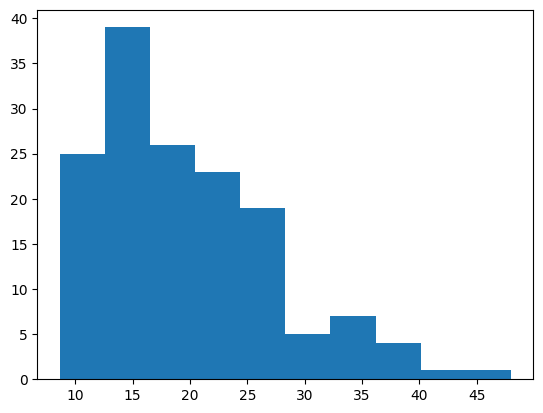

19.484646370979856 +- 15.454879075665907


In [74]:
# useful libraries
import matplotlib.pyplot as plt
import numpy as np

# use plt.hist to create histogram plot
# YOUR CODE HERE
num = 150
trajs = []
## fetch num of trajectories
for idx in range(num):
  trajs.append(collect_trajectory(policy_unif))
## compute returns
returns = []
gamma = 0.99
for idx in range(num):
  returns.append(compute_return(trajs[idx], gamma))

## output 1: histogram
plt.hist(returns)
plt.show()

## output 2: mean of returns
mean = sum(returns) / len(returns)
std_err2 = ((sum([((x - mean) ** 2) for x in returns]) / len(returns))) ** 0.5 * 2

print("{} +- {}".format(mean, std_err2))


**Q4 (Optional)**: A linear policy has parameters $\beta_1 \in \mathbb{R}^4$ and $\beta_0 \in \mathbb{R}$. It computes $\beta_1^\top x - \beta_0$, chooses action $+1$ if $\beta_1^\top x - \beta_0 \geq 0$, and chooses action $0$ otherwise.

Write a random search learner. Randomly generate $10$ linear policies, evaluate them by sampling trajectories, and output the policy with the highest return.



In [75]:
import numpy as np

policy_num = 10
param_record = []

### Step 1: define linear policy
def policy_linear(s):
  ## randomly generate parameter pairs
  policy = []
  beta1 = np.random.rand(1,4)*100-50
  beta0 = np.random.rand(1)*4-2
  policy.append(beta1)
  policy.append(beta0)
  param_record.append(policy)
  np.reshape(s,[-1,1])
  judge = beta1 @ s + beta0
  if judge >= 0:
    a = 1
  else:
    a = 0
  return a

### Step 2: sampling trajectories
trajs = []
## fetch num of trajectories
for idx in range(policy_num):
  trajs.append(collect_trajectory(policy_linear))
## compute returns
returns = []
gamma = 0.99
for idx in range(policy_num):
  returns.append(compute_return(trajs[idx], gamma))

## Step 3: find highest return
max = 0
max_idx = 0
for i in range(policy_num):
  if returns[i] > max:
    max = returns[i]
    max_idx = i
print("The highest return is {}.".format(max))
print("The corresponding linear policy is beta1 = {}, beta0 = {}".format(param_record[max_idx][0], param_record[max_idx][1]))


The highest return is 26.029962661171943.
The corresponding linear policy is beta1 = [[-13.77163648 -44.19732374 -39.45709654 -21.04647266]], beta0 = [1.71331307]


**Instructions on converting iPython notebook to pdf**

Please do not directly print the iPython notebook to pdf because it may have some issue if your code or text are too long.

Option 1: if you run the code locally with Jupyter Notebook or Jupyter Lab, there is an option to save to pdf from the menu.

Option 2: if you run the code on Google colab. (You can delete the block below if you run code locally.)

In [76]:
%%capture
# Here we use a script to generate pdf and save it to google drive.

# After executing this cell, you will be asked to link to your GoogleDrive account.
# Then, the pdf will be generated and saved to your GoogleDrive account and you need to go there to download;

from google.colab import drive
drive.mount('/content/drive')
# install tex; first run may take several minutes
! apt-get install texlive-xetex
# file path and save location below are default; please change if they do not match yours
! jupyter nbconvert --output-dir='/content/drive/MyDrive/' '/content/drive/MyDrive/Colab Notebooks/CS443RL_Assignment1.ipynb' --to pdf

Also feel free to use other methods as long as the converted file visually looks good.